In [1]:
import numpy as np
import pandas as pd

df_all = pd.read_csv('../ml_data/data.csv')

In [2]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df_all.iloc[:,:-1].values
y = df_all.iloc[:,-1].values

kf = KFold(n_splits=5, shuffle=True, random_state=12321)

random_state_list = range(1, 101)
ave_train_acc, best_train_acc = [], []
ave_test_acc, best_test_acc = [], []

for random_state in random_state_list:
    train_acc = []
    test_acc = []

    fold_n = 1
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        clf = RandomForestClassifier(n_estimators=100, max_leaf_nodes=10, n_jobs=-1, random_state=random_state)
        clf.fit(X_train, y_train)

        pred_train = clf.predict(X_train)
        pred_test = clf.predict(X_test)

        train_acc.append(accuracy_score(y_train, pred_train))
        test_acc.append(accuracy_score(y_test, pred_test))

        fold_n += 1
    
    ave_train_acc.append(sum(train_acc) / len(train_acc))
    best_train_acc.append(max(train_acc))
    ave_test_acc.append(sum(test_acc) / len(test_acc))
    best_test_acc.append(max(test_acc))


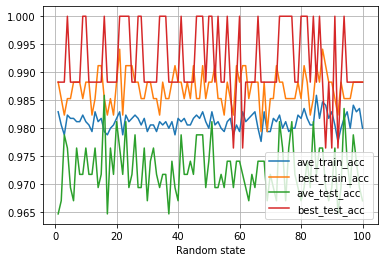

In [3]:
import matplotlib.pyplot as plt

plt.plot(random_state_list, ave_train_acc)
plt.plot(random_state_list, best_train_acc)
plt.plot(random_state_list, ave_test_acc)
plt.plot(random_state_list, best_test_acc)
plt.xlabel('Random state')
plt.legend(['ave_train_acc', 'best_train_acc', 'ave_test_acc', 'best_test_acc'], loc = 'lower right', fontsize=10)
plt.grid()

plt.show()

In [ ]:
plt.plot(random_state_list, ave_train_acc)
plt.plot(random_state_list, ave_test_acc)
plt.xlabel('Random state')
plt.legend(['ave_train_acc', 'ave_test_acc'], loc = 'lower right', fontsize=10)
plt.grid()

plt.show()